# Plotting a DEM

This notebook illustrates one method to load a geo-referenceed DEM into python and prepare a pseudocolor plot. This code requires that GDAL (geospatial data abstraction layer) be installed. Note that the DEM image was downloaded from the USGS National Map Viewer here:

https://viewer.nationalmap.gov

The DEM is a raster of the Marin Headlands near Mt. Tamalpais

In [21]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import gdal
from gdal import osr

In [31]:
demfile = 'data/marin_headlands.tif'
dem = gdal.Open(demfile)
dem_data = dem.ReadAsArray()
dem_transform = dem.GetGeoTransform()
dem_projection = dem.GetProjection()
n_cols = dem.RasterXSize
n_rows = dem.RasterYSize

inproj = osr.SpatialReference()
inproj.ImportFromWkt(dem_projection)
# print out the projection information
print(inproj)

projcs = inproj.GetAuthorityCode('PROJCS')
projection = ccrs.epsg(projcs)
print(projection)

PROJCS["NAD83 / UTM zone 10N",
    GEOGCS["NAD83",
        DATUM["North_American_Datum_1983",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6269"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4269"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-123],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","26910"]]
_EPSGProjection(26910)


The above code tells cartopy how to recognize the map projection. It is based on the instructions here:

https://ocefpaf.github.io/python4oceanographers/blog/2015/03/02/geotiff/

In [27]:
# from the very useful information here: http://alimanfoo.github.io/2016/10/04/plotting-african-ecosystems.html
origin_x = dem_transform[0]
origin_y = dem_transform[3]
pixel_width = dem_transform[1]
pixel_height = dem_transform[5]
extent_lonlat = (
    origin_x, 
    origin_x + (pixel_width * dem.RasterXSize),
    origin_y + (pixel_height * dem.RasterYSize),
    origin_y
)

In [40]:
# The DEM contains values < 0 that represent missing data. Set these values all equal to 0.0
dem_data[dem_data<0.0]=0.0

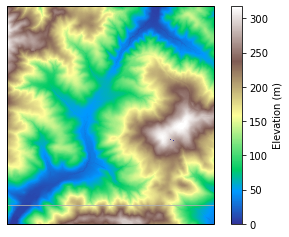

In [41]:
crs_lonlat = ccrs.PlateCarree() # lon/lat projection
color_map = plt.get_cmap('terrain')
proj = projection
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=proj)
#ax.set_extent(extent_lonlat, crs=crs_lonlat)
p=ax.imshow(dem_data,extent=extent_lonlat,cmap=color_map, origin='upper')
plt.colorbar(p,label='Elevation (m)')
ax.coastlines(resolution='10m')
gl = ax.gridlines(crs=crs_lonlat, 
                  xlocs=np.arange(-180, 180, 0.1), 
                  ylocs=np.arange(-90, 90, 0.1), 
                  draw_labels=False)
plt.show()